In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
raw_data = 'transaction-data-adhoc-analysis.json'

df = pd.read_json(raw_data)
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [132]:
#isolate items and values
price_df = df.copy()
price_df = price_df[['transaction_items', 'transaction_value']]

#separate rows with multiple products and get those with only 1 item type
price_df['transaction_items'] = price_df['transaction_items'].str.split(';')
price_df = price_df[price_df['transaction_items'].apply(len) == 1]

#create quantity column and clean transaction_items column
price_df['transaction_items'] = price_df['transaction_items'].apply(lambda x: x[0][:-1].split(',(x'))
price_df['quantity'] = price_df['transaction_items'].apply(lambda x: int(x[1]))
price_df['transaction_items'] = price_df['transaction_items'].apply(lambda x: x[0])

#get 1 of each item type & their prices
price_df.drop_duplicates(subset='transaction_items', keep='first', inplace = True)
products = list(price_df['transaction_items'].values)
price_df = price_df['transaction_value'] / price_df['quantity']

#products and respective prices, least-most expensive
price_df.index = products
price_df.sort_values()

Candy City,Gummy Worms               150.0
Candy City,Orange Beans              199.0
HealthyKid 3+,Yummy Vegetables       500.0
Exotic Extras,Kimchi and Seaweed     799.0
Exotic Extras,Beef Chicharon        1299.0
HealthyKid 3+,Gummy Vitamins        1500.0
HealthyKid 3+,Nutrional Milk        1990.0
dtype: float64

In [169]:
#creates a new row per item type from transaction_items
new_df = df.assign(transaction_items=df.transaction_items.str.split(";")).explode('transaction_items').reset_index(drop=True)

#separate transaction items and respective quantities
new_df['transaction_items'] = new_df['transaction_items'].apply(lambda x: x[:-1].split(',(x'))
new_df['quantity'] = new_df['transaction_items'].apply(lambda x: int(x[1]))
new_df['transaction_items'] = new_df['transaction_items'].apply(lambda x: x[0])

new_df['transaction_value'] = new_df['quantity'] * new_df['transaction_items'].apply(lambda x: price_df.loc[x])
new_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,quantity
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon",5196.0,2022/01/12,4
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon",3897.0,2022/01/12,3
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk",7960.0,2022/01/12,4
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans",199.0,2022/01/12,1
4,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins",4500.0,2022/01/08,3
...,...,...,...,...,...,...,...,...,...,...
166114,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk",3980.0,2022/06/09,2
166115,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms",300.0,2022/06/09,2
166116,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk",1990.0,2022/06/03,1
166117,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms",450.0,2022/06/03,3


In [235]:
new_df['transaction_date'] = pd.to_datetime(new_df["transaction_date"], format="%Y/%m/%d")
new_df['Month'] = new_df['transaction_date'].dt.month

months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June'}

months_df = new_df[['transaction_value','quantity']].groupby([new_df.transaction_items, new_df.transaction_date.dt.month]).agg(sum)
months_df.index.names = ['Item', 'Month']
months_df.columns = ["Sales", "Count"]
months_df


Sales  Count
Item                             Month                   
Candy City,Gummy Worms           1       1433850.0   9559
                                 2       1499400.0   9996
                                 3       1497900.0   9986
                                 4       1506450.0  10043
                                 5       1470150.0   9801
                                 6       1490100.0   9934
Candy City,Orange Beans          1       1945026.0   9774
                                 2       1997363.0  10037
                                 3       1912589.0   9611
                                 4       1972886.0   9914
                                 5       1982836.0   9964
                                 6       2011094.0  10106
Exotic Extras,Beef Chicharon     1      12554835.0   9665
                                 2      12991299.0  10001
                                 3      12750984.0   9816
                                 4      12847110.0   9890
                                 5      13026372.0  10028
                                 6      12862698.0   9902
Exotic Extras,Kimchi and Seaweed 1       7731124.0   9676
                                 2       7949251.0   9949
                                 3       7963633.0   9967
                                 4       7926879.0   9921
                                 5       7808627.0   9773
                                 6       8073096.0  10104
HealthyKid 3+,Gummy Vitamins     1      14521500.0   9681
                                 2      14970000.0   9980
                                 3      15217500.0  10145
                                 4      14763000.0   9842
                                 5      14922000.0   9948
                                 6      14970000.0   9980
HealthyKid 3+,Nutrional Milk     1      19356730.0   9727
                                 2      19285090.0   9691
                                 3      19653240.0   9876
                                 4      19474140.0   9786
                                 5      19663190.0   9881
                                 6      19436330.0   9767
HealthyKid 3+,Yummy Vegetables   1       4979500.0   9959
                                 2       5128000.0  10256
                                 3       4948000.0   9896
                                 4       4930500.0   9861
                                 5       4867500.0   9735
                                 6       4861000.0   9722

In [263]:
CCGM_df = months_df.loc['Candy City,Gummy Worms'].copy()
CCGM_df.rename(index = months, inplace = True)
CCGM_df

,Sales,Count
Month,,
January,1433850.0,9559
February,1499400.0,9996
March,1497900.0,9986
April,1506450.0,10043
May,1470150.0,9801
June,1490100.0,9934


In [262]:
CCOB_df = months_df.loc['Candy City,Orange Beans'].copy()
CCOB_df.rename(index = months, inplace = True)
CCOB_df

,Sales,Count
Month,,
January,1945026.0,9774
February,1997363.0,10037
March,1912589.0,9611
April,1972886.0,9914
May,1982836.0,9964
June,2011094.0,10106


In [261]:
EEBC_df = months_df.loc['Exotic Extras,Beef Chicharon'].copy()
EEBC_df.rename(index = months, inplace = True)
EEBC_df

,Sales,Count
Month,,
January,12554835.0,9665
February,12991299.0,10001
March,12750984.0,9816
April,12847110.0,9890
May,13026372.0,10028
June,12862698.0,9902


In [260]:
EEKS_df = months_df.loc['Exotic Extras,Kimchi and Seaweed'].copy()
EEKS_df.rename(index = months, inplace = True)
EEKS_df

,Sales,Count
Month,,
January,7731124.0,9676
February,7949251.0,9949
March,7963633.0,9967
April,7926879.0,9921
May,7808627.0,9773
June,8073096.0,10104


In [259]:
HKGV_df = months_df.loc['HealthyKid 3+,Gummy Vitamins'].copy()
HKGV_df.rename(index = months, inplace = True)
HKGV_df

,Sales,Count
Month,,
January,14521500.0,9681
February,14970000.0,9980
March,15217500.0,10145
April,14763000.0,9842
May,14922000.0,9948
June,14970000.0,9980


In [281]:
HKNM_df = months_df.loc['HealthyKid 3+,Nutrional Milk'].copy()
HKNM_df.rename(index = months, inplace = True)
HKNM_df

,Sales,Count
Month,,
January,19356730.0,9727
February,19285090.0,9691
March,19653240.0,9876
April,19474140.0,9786
May,19663190.0,9881
June,19436330.0,9767


In [289]:
HKYV_df = months_df.loc['HealthyKid 3+,Yummy Vegetables'].copy()
HKYV_df.rename(index = months, inplace = True)
HKYV_df

,Sales,Count
Month,,
January,4979500.0,9959
February,5128000.0,10256
March,4948000.0,9896
April,4930500.0,9861
May,4867500.0,9735
June,4861000.0,9722


In [395]:
customers_df = new_df[['name','quantity']].copy()
customers_df['month'] = new_df.transaction_date.dt.month

customers_df = pd.pivot_table(
    customers_df,
    values = 'quantity', 
    index = ['month'],
    columns = ['name'],
    aggfunc = sum,
    fill_value = 0
)

customers_df

name,Aaron Beasley,Aaron Brewer,Aaron Brown,Aaron Coffey,Aaron Davis,Aaron Escobar,Aaron Flores,Aaron Flowers,Aaron Garrett,Aaron Holder,...,Zachary Richard,Zachary Salinas,Zachary Scott,Zachary Smith,Zachary Torres,Zachary Valentine,Zachary Ware,Zachary Williams,Zachary Wilson,Zachary York
month,,,,,,,,,,,,,,,,,,,,,
1,0,4,0,1,6,0,11,11,8,0,...,17,0,13,16,0,7,6,24,0,8
2,0,6,0,7,1,11,15,3,15,13,...,15,1,15,10,0,6,9,23,0,17
3,0,1,20,9,0,0,5,0,6,9,...,14,0,3,19,14,3,16,19,0,7
4,9,9,14,12,15,1,8,5,0,4,...,27,5,15,31,6,2,5,14,4,12
5,8,0,8,12,15,7,0,0,7,8,...,8,13,9,31,7,14,10,0,4,23
6,1,13,1,0,12,0,1,16,7,6,...,10,4,5,40,9,19,8,0,10,5


In [399]:
repeaters = customers_df.apply(lambda x: [0 if i==1 else (1 if x[i-1] and x[i] else 0)for i in x.index]).transpose().sum()
inactives = customers_df.apply(lambda x: [0 if i==1 else ((1 if x[i]==0 else 0) if any(x[:i]) else 0) for i in x.index]).transpose().sum()
engaged = customers_df.apply(lambda x: [all(x[:i]) for i in x.index]).sum(axis=1)

behavior_df = pd.DataFrame({
    'repeater': repeaters,
    'inactive': inactives,
    'engaged' : engaged
})

loyalty_df = behavior_df.transpose().rename(columns = months)
loyalty_df


month,January,February,March,April,May,June
repeater,0,5172,5216,5154,5110,5193
inactive,0,1416,1747,1909,1917,1835
engaged,6588,5172,4126,3289,2667,2190


Data Visualization Below


Text(0, 0.5, 'Sales (in m)')

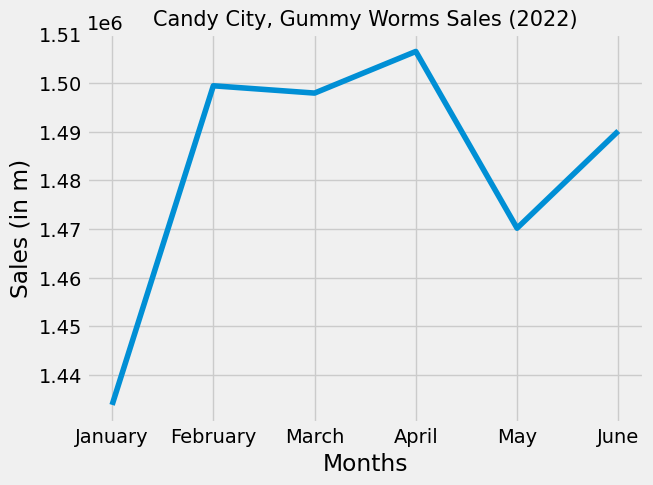

In [461]:
plt.style.use('fivethirtyeight')

plt.plot(CCGM_df.index, CCGM_df['Sales'])
plt.title('Candy City, Gummy Worms Sales (2022)', size = 15)
plt.xlabel('Months')
plt.ylabel('Sales (in m)')



Text(0, 0.5, 'Sales (in m)')

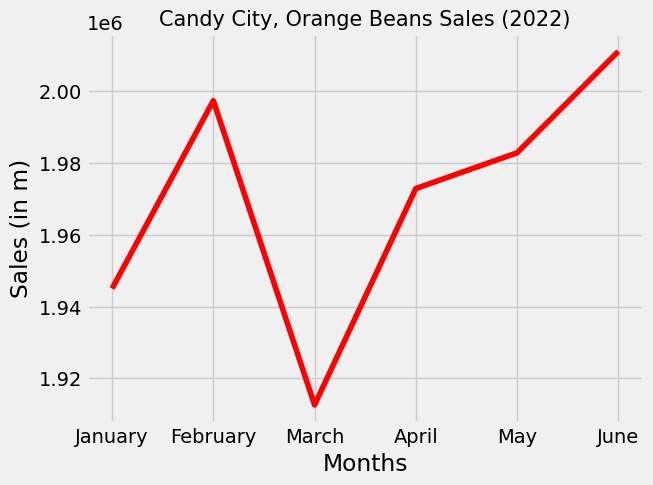

In [438]:
plt.plot(CCOB_df.index, CCOB_df['Sales'], color = 'r')
plt.title('Candy City, Orange Beans Sales (2022)', size = 15)
plt.xlabel('Months')
plt.ylabel('Sales (in m)')

Text(0, 0.5, 'Sales (in 10m)')

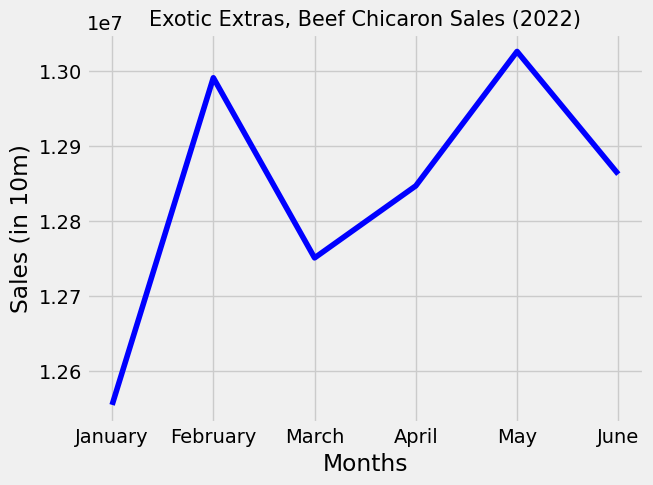

In [459]:
plt.plot(EEBC_df.index, EEBC_df['Sales'], color = 'b')
plt.title('Exotic Extras, Beef Chicaron Sales (2022)', size = 15)
plt.xlabel('Months')
plt.ylabel('Sales (in 10m)')

Text(0, 0.5, 'Sales (in m)')

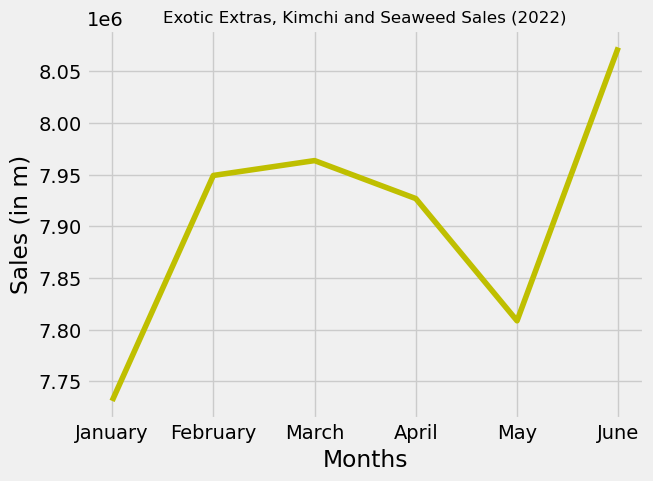

In [444]:
plt.plot(EEKS_df.index, EEKS_df['Sales'], color = 'y')
plt.title('Exotic Extras, Kimchi and Seaweed Sales (2022)', size = 12)
plt.xlabel('Months')
plt.ylabel('Sales (in m)')

Text(0, 0.5, 'Sales (in 10m)')

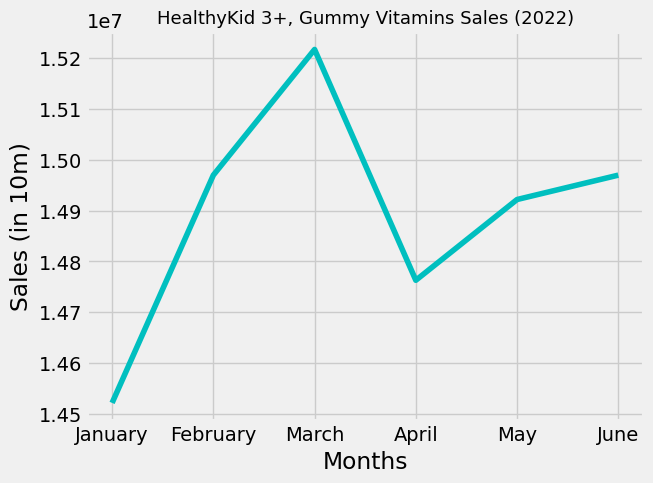

In [451]:
plt.plot(HKGV_df.index, HKGV_df['Sales'], color = 'c')
plt.title('HealthyKid 3+, Gummy Vitamins Sales (2022)', size = 13)
plt.xlabel('Months')
plt.ylabel('Sales (in 10m)')

Text(0, 0.5, 'Sales (in 10m)')

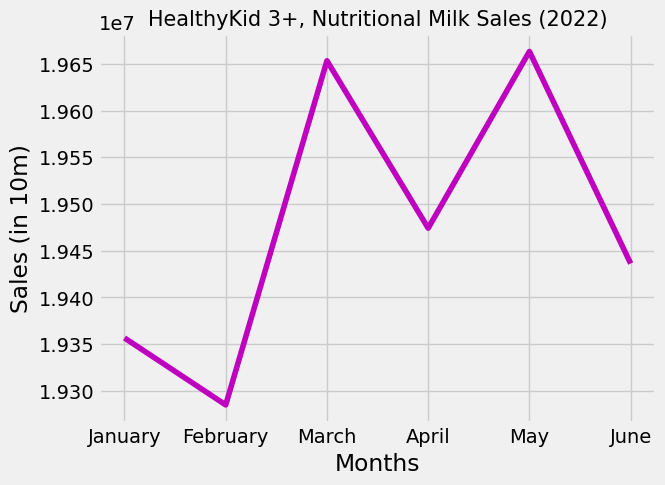

In [454]:
plt.plot(HKNM_df.index, HKNM_df['Sales'], color = 'm')
plt.title('HealthyKid 3+, Nutritional Milk Sales (2022)', size = 15)
plt.xlabel('Months')
plt.ylabel('Sales (in 10m)')

Text(0, 0.5, 'Sales (in m)')

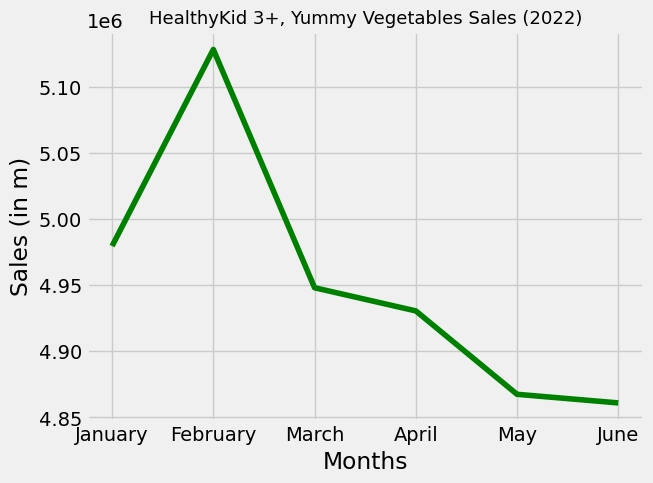

In [458]:
plt.plot(HKYV_df.index, HKYV_df['Sales'], color = 'g')
plt.title('HealthyKid 3+, Yummy Vegetables Sales (2022)', size = 13)
plt.xlabel('Months')
plt.ylabel('Sales (in m)')

<AxesSubplot:>

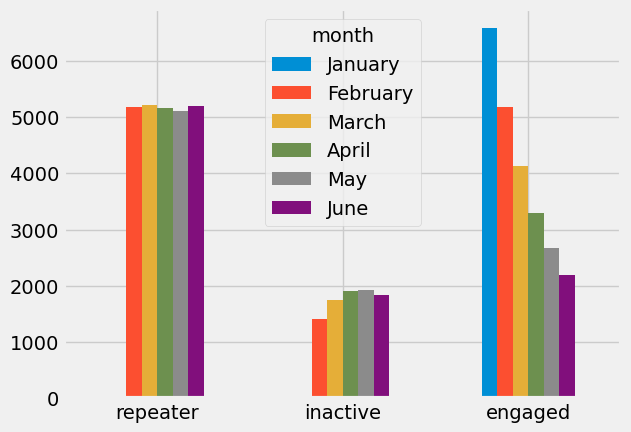

In [462]:
loyalty = loyalty_df.plot.bar(rot = 0)
loyalty